#  "Hello world" of "Machine Learning"
This will be my first attempt to put in to test, machine learning self-study I did for past few weeks.

This is ML 101 competition in Kaggle, where main challenge to is to predict who is likely to survive during the sinking on Titanic in 1912

Following is details of data supplied by Kaggle

VARIABLE DESCRIPTIONS:

* survival - Survival (0 = No; 1 = Yes)

* pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

* name - Name

* sex - Sex

* age - Age

* sibsp - Number of Siblings/Spouses Aboard

* parch - Number of Parents/Children Aboard

* ticket - Ticket Number

* fare - Passenger Fare

* cabin - Cabin

* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
#Getting basic libraries
%matplotlib inline 
import pandas as pd
import numpy as np
#import pylab as plt 
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options

Below function will take up training and test dataframe and do some basic data cleaning.
It will remove some unwanted colums:
- Name
- Ticket
- Cabin
- Fare

It will also convert Embarked and Sex data into numerical data

In [3]:
def data_prep(dataFrame):
    dataFrame=dataFrame.drop("Name", axis=1)
    dataFrame=dataFrame.drop("Ticket", axis=1)
    dataFrame=dataFrame.drop("Cabin", axis=1)
    dataFrame=dataFrame.drop("Fare", axis=1)
    dataFrame['Embarked'] = dataFrame['Embarked'].fillna("U")
    #dataFrame=dataFrame.dropna()
    pclass_mapping = {label:idx for idx, label in enumerate(np.unique(dataFrame.Sex))}
    dataFrame['Sex'] = dataFrame['Sex'].map(pclass_mapping)
    emb_mapping = {label:idx for idx, label in enumerate(np.unique(dataFrame.Embarked))}
    dataFrame['Embarked'] = dataFrame['Embarked'].map(emb_mapping)
    dataFrame=dataFrame.fillna(-1)
    return dataFrame

In [4]:
clean_data = pd.read_csv("train.csv")

In [5]:
clean_data = data_prep(clean_data)

## Some basic data exploration

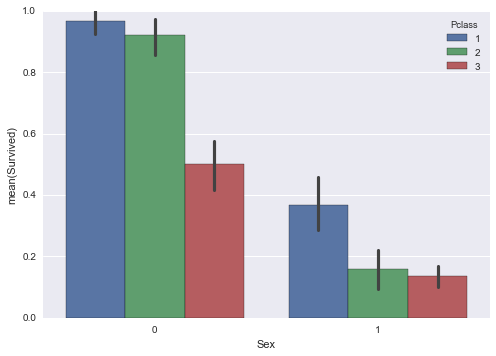

In [6]:
sns.barplot(x="Sex", y="Survived", hue='Pclass', data=clean_data)

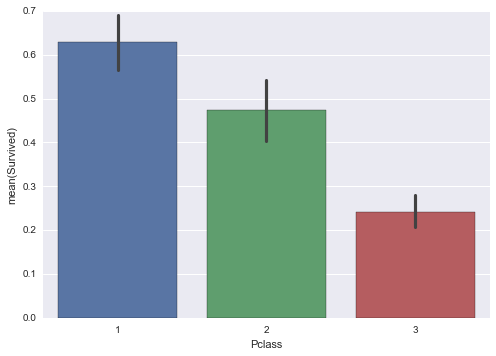

In [7]:
sns.barplot(x="Pclass", y="Survived", data=clean_data)

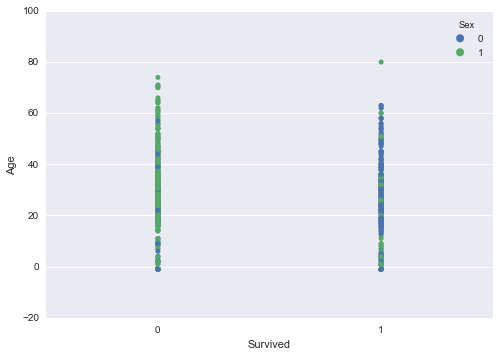

In [8]:
sns.stripplot(x='Survived', y='Age', hue='Sex', data=clean_data)

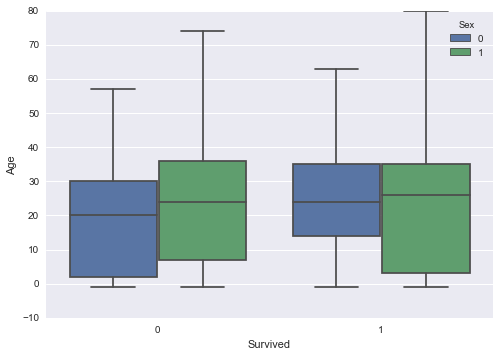

In [9]:
sns.boxplot(x='Survived', y='Age', hue='Sex' , data=clean_data)

## Getting feel of grouping in pandas

In [10]:
gr_data = clean_data['Sex'].groupby(clean_data['Pclass'])

In [11]:
a = gr_data.count()
b = gr_data.sum()

In [12]:
print(a)
print(b)
a - b

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64
Pclass
1    122
2    108
3    347
Name: Sex, dtype: int64


Pclass
1     94
2     76
3    144
Name: Sex, dtype: int64

In [13]:
a = clean_data.groupby(['Pclass', 'Sex'])

In [14]:
a.Survived.sum()

Pclass  Sex
1       0      91
        1      45
2       0      70
        1      17
3       0      72
        1      47
Name: Survived, dtype: int64

In [15]:
a.Survived.count()

Pclass  Sex
1       0       94
        1      122
2       0       76
        1      108
3       0      144
        1      347
Name: Survived, dtype: int64

In [16]:
a.Embarked.sum()

Pclass  Sex
1       0      103
        1      159
2       0      136
        1      195
3       0      209
        1      569
Name: Embarked, dtype: int64

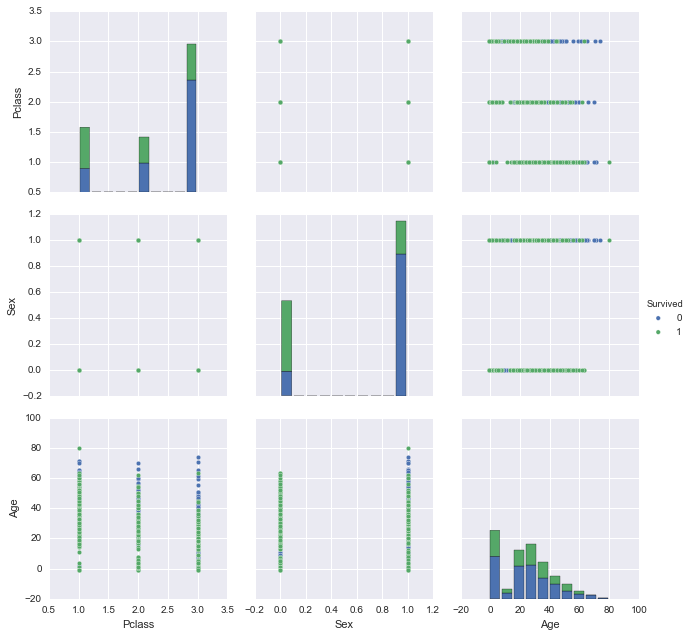

In [17]:
sns.pairplot(clean_data, vars=["Pclass", "Sex", "Age"], hue="Survived", size=3)

In [18]:
train_clean = clean_data

In [19]:
clean_data_test = pd.read_csv("test.csv")

In [20]:
test_clean = data_prep(clean_data_test)

In [21]:
test_clean.shape

(418, 7)

In [22]:
test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [23]:
train_clean.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
5,6,0,3,1,-1.0,0,0,1


## Feature Engineering
* Adding another column with joint weight of Passenger class, sex, and age
* Second columan added for family

In [24]:
train_clean["combo"] = (4-train_clean["Pclass"])*(2-train_clean["Sex"])*(100-train_clean["Age"])
test_clean["combo"] = (4-test_clean["Pclass"])*(2-test_clean["Sex"])*(100-test_clean["Age"])

In [25]:
train_clean["family"] = train_clean["SibSp"]+train_clean["Parch"]+1
test_clean["family"] = test_clean["SibSp"]+test_clean["Parch"]+1

## Standardizing data for machine learning algorithms

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
sc.fit(train_clean.iloc[:,2:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
train_clean_stn = sc.transform(train_clean.iloc[:,2:])

In [30]:
test_clean_stn = sc.transform(test_clean.iloc[:,1:])

In [31]:
from sklearn.cross_validation import train_test_split

In [32]:
response = train_clean.iloc[:,1].as_matrix()

In [33]:
type(response)

numpy.ndarray

In [34]:
response = response.astype(int)

In [35]:
X_tr, X_te, y_tr, y_te = train_test_split(train_clean_stn,response, test_size = .2, random_state =1  )

## Applying Logistic regression,SVM, KNN, Desicion treen, Random forest

In [36]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
C=[1000,100,10,1,.1,.01,.001,100]
for c in C:
    logistic = LogisticRegression(C=c, random_state=0)
    logistic.fit(X_tr,y_tr)
    predict = logistic.predict(X_te)
    accu = metrics.accuracy_score(y_te,predict)
    print(accu)

0.782122905028
0.782122905028
0.782122905028
0.787709497207
0.782122905028
0.776536312849
0.748603351955
0.782122905028


In [37]:
#Suppport vector machines
from sklearn.svm import SVC
C=[1000,100,10,1,.1,.01]
for c in C:
    suppVec = SVC(C=c,kernel='linear', random_state=0)
    suppVec.fit(X_tr,y_tr)
    predSVM = suppVec.predict(X_te)
    accSVM = metrics.accuracy_score(y_te,predSVM)
    print(accSVM)

0.776536312849
0.776536312849
0.776536312849
0.776536312849
0.776536312849
0.776536312849


In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
N = [1,2,5,10,20,50,100,20]
for n in N:
    knn_clf = KNeighborsClassifier(n_neighbors=n, p=2, metric='minkowski')
    knn_clf.fit(X_tr,y_tr)
    knn_pred = knn_clf.predict(X_te)
    accKNN=metrics.accuracy_score(y_te,knn_pred)
    print(accKNN)

0.72625698324
0.748603351955
0.765363128492
0.743016759777
0.77094972067
0.793296089385
0.793296089385
0.77094972067


In [39]:
#Desicion tree
from sklearn.tree import DecisionTreeClassifier
D = [2,3,4,5,6,10,5]
for d in D:
    dtree = DecisionTreeClassifier(max_depth=d, criterion='entropy',random_state=0)
    dtree.fit(X_tr,y_tr)
    dtree_pred = dtree.predict(X_te)
    accDtree=metrics.accuracy_score(y_te,dtree_pred)
    print(accDtree)

0.776536312849
0.782122905028
0.748603351955
0.754189944134
0.748603351955
0.754189944134
0.754189944134


In [40]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
N = [10,20,30,100,500]
for n in N:
    ranFor = RandomForestClassifier(n_estimators=n,criterion='gini',random_state=0,n_jobs=2,min_samples_split=8, min_samples_leaf=2)
    ranFor.fit(X_tr,y_tr)
    ranFor_pred = ranFor.predict(X_te)
    accRanFor = metrics.accuracy_score(y_te,ranFor_pred)
    print(accRanFor)

0.776536312849
0.776536312849
0.776536312849
0.782122905028
0.776536312849


In [41]:
clean_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
combo          float64
family           int64
dtype: object

## Running Cross validation

In [42]:
from sklearn.cross_validation import StratifiedKFold
print(c)

0.01


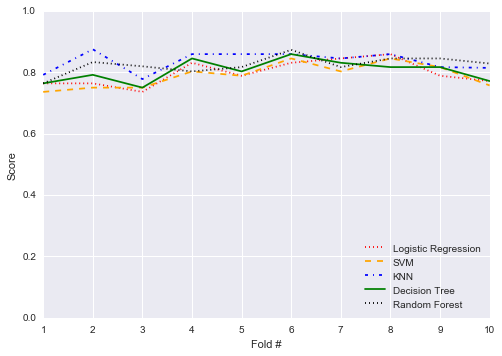

In [43]:
#%debug
#clfs = ['logistic', 'suppVec', 'knn_clf', 'dtree', 'ranFo']
clfs = [logistic, suppVec, knn_clf, dtree, ranFor]
clf_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
colors = ['red', 'orange', 'blue', 'green', 'black']
linestyles = [':', '--', '-.', '-',':']

kfold = StratifiedKFold(y=y_tr, n_folds=10, random_state=0)
scores=[]
ks=[]
c=100
#logistic = LogisticRegression(C=100, random_state=0)
#import ipdb; ipdb.set_trace()
for algo, lable, clr, ls in zip(clfs, clf_names,colors,linestyles):
    scores=[]
    ks=[]
    #print(algo)
    for k, (train,test) in enumerate(kfold):
        algo.fit(X_tr[train], y_tr[train])
        score = algo.score(X_tr[test], y_tr[test])
        scores.append(score)
        ks.append(k+1)
        #print(score)
        #print(k,score)
        #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_tr[train]), score))
    plt.plot(ks,scores,color=clr,linestyle=ls,label=lable)
    
plt.legend(loc='lower right')
plt.xlim([1, 10])
plt.ylim([0, 1])
plt.grid(True)
plt.xlabel('Fold #')
plt.ylabel('Score')
plt.show()

In [44]:
test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,combo,family
0,892,3,1,34.5,0,0,1,65.5,1
1,893,3,0,47.0,1,0,2,106.0,2
2,894,2,1,62.0,0,0,1,76.0,1
3,895,3,1,27.0,0,0,2,73.0,1
4,896,3,0,22.0,1,1,2,156.0,3


## Using various algorithms for predicting survival from test data. Also generating file for subimission to Kaggle.

In [45]:
predict_dtree = dtree.predict(test_clean_stn)
predict_logistic = logistic.predict(test_clean_stn)
predict_knn = knn_clf.predict(test_clean_stn)
predict_ranFor = ranFor.predict(test_clean_stn)

In [46]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_dtree
    })
submission.to_csv("dtree2.csv")

In [47]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_logistic
    })
submission.to_csv("logistic2.csv")

In [48]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_knn
    })
submission.to_csv("knn_clf2.csv")

In [49]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": predict_ranFor
    })
submission.to_csv("ranFor2.csv")

## Try out some Voting classifiers

In [70]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
voting_class1 = VotingClassifier(estimators=[
        ('lr',logistic),('rf',ranFor),('knn',knn_clf),('dt',dtree)], voting='soft')
voting_class2 = VotingClassifier(estimators=[
        ('lr',logistic),('rf',ranFor),('knn',knn_clf),('dt',dtree)], voting='hard')

In [60]:
voting_class1_fit = voting_class1.fit(X_tr,y_tr)
voting_class2_fit = voting_class2.fit(X_tr,y_tr)

In [61]:
pred_voting_class1 = voting_class1_fit.predict(test_clean_stn)
pred_voting_class2 = voting_class2_fit.predict(test_clean_stn)

In [66]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": pred_voting_class1
    })
submission.to_csv("pred_voting_class1.csv")
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": pred_voting_class2
    })
submission.to_csv("pred_voting_class2.csv")

In [67]:
voting_class3 = VotingClassifier(estimators=[
        ('lr',logistic),('rf',ranFor),('knn',knn_clf),('dt',dtree)], voting='hard',weights=[1,2,2,1])
voting_class3_fit = voting_class3.fit(X_tr,y_tr)
pred_voting_class3 = voting_class3_fit.predict(test_clean_stn)

In [68]:
voting_class4 = VotingClassifier(estimators=[
        ('lr',logistic),('rf',ranFor),('knn',knn_clf),('dt',dtree)], voting='hard',weights=[2,1,2,1])
voting_class4_fit = voting_class4.fit(X_tr,y_tr)
pred_voting_class4 = voting_class4_fit.predict(test_clean_stn)

In [69]:
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": pred_voting_class3
    })
submission.to_csv("pred_voting_class3.csv")
submission = pd.DataFrame({
        "PassengerID": test_clean['PassengerId'],
        "Survived": pred_voting_class4
    })
submission.to_csv("pred_voting_class4.csv")